                                 Name    Year Duration            Genre  \
0                                         NaN      NaN            Drama   
1  #Gadhvi (He thought he was Gandhi)  (2019)  109 min            Drama   
2                         #Homecoming  (2021)   90 min   Drama, Musical   
3                             #Yaaram  (2019)  110 min  Comedy, Romance   
4                   ...And Once Again  (2010)  105 min            Drama   

   Rating Votes            Director       Actor 1             Actor 2  \
0     NaN   NaN       J.S. Randhawa      Manmauji              Birbal   
1     7.0     8       Gaurav Bakshi  Rasika Dugal      Vivek Ghamande   
2     NaN   NaN  Soumyajit Majumdar  Sayani Gupta   Plabita Borthakur   
3     4.4    35          Ovais Khan       Prateik          Ishita Raj   
4     NaN   NaN        Amol Palekar  Rajat Kapoor  Rituparna Sengupta   

           Actor 3  
0  Rajendra Bhatia  
1    Arvind Jangid  
2       Roy Angana  
3  Siddhant Kapoor  
4    

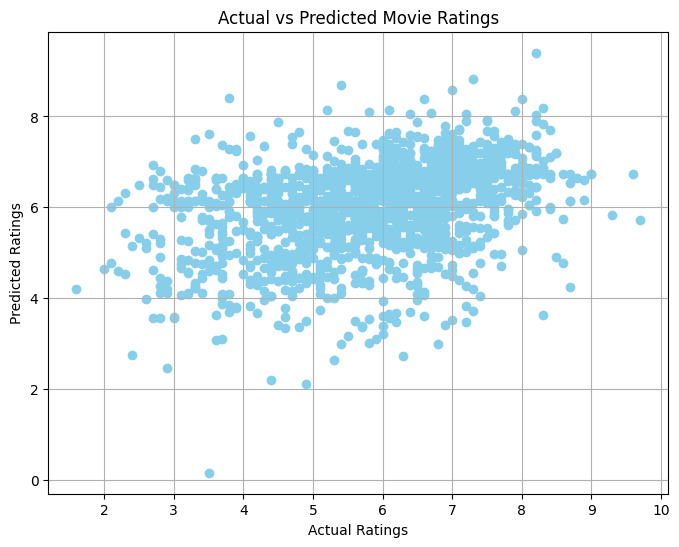

In [14]:
# Step 1: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Step 2: Load the dataset
import pandas as pd

# Fixing encoding issue
df = pd.read_csv("IMDb Movies India.csv", encoding='latin1')

# Check if it loaded correctly
print(df.head())
print(df.columns)


# Step 3: Explore the dataset
print(df.head())
print(df.columns)
print(df.info())
print(df.describe())
print(df.isnull().sum())

# Step 4: Keep relevant columns (adjust if your column names differ)
# For example: 'genre', 'director', 'actors', 'rating'
# If not available, explore other useful features
df = df[['Genre', 'Director', 'Rating']].dropna()


# Rename avg_vote to rating for clarity
df.rename(columns={'avg_vote': 'rating'}, inplace=True)

# Step 5: Encode categorical features
df_encoded = pd.get_dummies(df, columns=['Genre', 'Director'], drop_first=True)

# Step 6: Prepare X and y
X = df_encoded.drop('Rating', axis=1)
y = df_encoded['Rating']


# Step 7: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 8: Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 9: Predict and evaluate
predictions = model.predict(X_test)

print("R² Score:", r2_score(y_test, predictions))
print("Mean Squared Error:", mean_squared_error(y_test, predictions))

# Step 10: Visualize prediction results
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, color='skyblue')
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.title("Actual vs Predicted Movie Ratings")
plt.grid(True)
plt.show()
